In [1]:
from sklearn.preprocessing import PolynomialFeatures

import skimage
import os
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
from skimage import data
from skimage import io
import glob
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import PolynomialFeatures
import re
from scipy import stats
from skimage.viewer import ImageViewer
import cv2
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.externals import joblib
import subprocess
import time
import statsmodels.regression.linear_model as sm
from statsmodels.api import OLS



/anaconda/envs/python3/lib/python3.6/site-packages/skimage/viewer/__init__.py:6: UserWarning: Viewer requires Qt
  warn('Viewer requires Qt')
/anaconda/envs/python3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
from RecSystemKM import RecSystemKM_test
path = '/Users/kimia/Desktop/Capstone/hotel/Rec_system/'
df = pd.read_csv(path+'users_followers_merged.csv')

In [54]:


temp_path = '/Users/kimia/Desktop/Capstone/hotel/Rec_system/User_pics/'
train_path = '/Users/kimia/Desktop/Capstone/hotel/Rec_system/User_pics/'
save_path = '/Users/kimia/Desktop/Capstone/hotel/Rec_system/User_pics/'
dest_img =  '/Users/kimia/Desktop/Capstone/hotel/Rec_system/User_pics/'


In [42]:
#usernames_boho.txt, usernames_hc.txt, usernames_wl.txt
boho = pd.read_csv("usernames_boho.txt", names = ['username'])
HC = pd.read_csv("usernames_hc.txt", names = ['username'])
WL = pd.read_csv("usernames_wl.txt", names = ['username'])

usernames = (pd.concat([WL, HC, boho])).reset_index()
for i,v in enumerate(usernames.username):
    usernames.username[i] = usernames.username[i][0:-4]
    
userlist = list(usernames.username)

/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
c = RecSystemKM_test(train_path, save_path )

In [58]:
c.Karans_get_train_images(['All']) 

### didnt pull full 1000 w/ instaloader idk why 
# ls -l | grep \.jpg | wc -l

Number of images loaded: 249


In [59]:
train_df = c.convert_to_features(columns = ["User_Handle","URL","R_Mean", "R_STD", "R_MED", "G_Mean", "G_STD", 
                "G_MED", "B_Mean", "B_STD", "B_MED", "Canny", "ORB_X", "ORB_Y"])

In [65]:
for i,v in enumerate(train_df['URL']):
    train_df['URL'][i] = train_df['URL'][i][0:-4]

In [67]:
train_df['username'] = train_df['URL']

In [ ]:
# now merge with the other meta data 


In [68]:
path = '/Users/kimia/Desktop/Capstone/hotel/Rec_system/'
df_usernames = pd.read_csv(path+'DF_metadata_COMPLETE.csv')


In [265]:
DF_all_vectorized_w_metadata= pd.merge(train_df, df_usernames, on='username',)
DF_all_vectorized_w_metadata.to_csv('DF_all_vectorized_w_metadata.csv')

DF_all_vectorized_w_metadata = pd.read_csv(path+'DF_all_vectorized_w_metadata.csv')

In [ ]:
for i,v in enumerate(DF_all_vectorized_w_metadata.followers):
    DF_all_vectorized_w_metadata['followers'][i] = DF_all_vectorized_w_metadata['followers'][i].replace(",", "")

In [ ]:
df['followers'] = (df['followers'].apply(lambda x: x.replace('k',"000").replace(".","").replace("m","000000").replace(",","")))
df.followers = pd.to_numeric(df.followers)

In [256]:
"""def clean_numbers(df, column):
    for i,v in enumerate(df[column]):
        df[str(column)][i] = df[str(column)][i].replace(",", "")
        df[str(column)] = (df[str(column)].apply(lambda x: x.replace('k',"000").replace(".","").replace("m","000000").replace(",","")))
        df[str(column)] = pd.to_numeric(df[str(column)])
"""
def zscore(x,mu,std):
    zscore = (x-mu)/std
    return(zscore)

def metrics(df): 
    df[['likes','followers']] = df[['likes','followers']].apply(pd.to_numeric)
  

    df['likes_score'] = (df['likes'])/(df['followers'])
    
    df['comments_score'] = (df['comments'])/(df['followers'])
    
    df['zscore_likes'] = zscore(df['likes_score'], df.likes_score.std(), df.likes_score.mean())
    
    df['zscore_comments'] = zscore(df['comments_score'], df.comments_score.std(), df.comments_score.mean())
    
    #df['final_score'] = df['zscore_likes'] + df['zscore_comments']
    df['numerical_score'] = df['likes_score'] + df['comments_score']
    
    ###### need to edit this
    df['final_score'] = 1

    

"""def metrics(df): 
    df[['likes','followers']] = df[['likes','followers']].apply(pd.to_numeric)
  

    df['likes_score'] = (df['likes'])/(df['followers'])
    
    df['comments_score'] = (df['comments'])/(df['followers'])
    
    df['zscore_likes'] = zscore(df['likes_score'], df.likes_score.std(), df.likes_score.mean())
    
    df['zscore_comments'] = zscore(df['comments_score'], df.comments_score.std(), df.comments_score.mean())
    
    df['final_score'] = (df['likes_score']) +df['comments_score']"""

"""def metrics(df): 
    df[['likes','followers']] = df[['likes','followers']].apply(pd.to_numeric)
  

    df['likes_score'] = (df['likes'])/(df['followers'])
    
    df['comments_score'] = (df['comments'])/(df['followers'])
    
    df['zscore_likes'] = zscore(df['likes_score'], df.likes_score.std(), df.likes_score.mean())
    
    df['zscore_comments'] = zscore(df['comments_score'], df.comments_score.std(), df.comments_score.mean())
    
    #rate = lambda T: 200*exp(-T) if T>200 else 400*exp(-T)
    
    df['final_score'] = (df['zscore_likes'] + df['zscore_comments']) 
    #lambda x: x=1 if (df['zscore_likes'] + df['zscore_comments'])> 1 else x =0"""

"def metrics(df): \n    df[['likes','followers']] = df[['likes','followers']].apply(pd.to_numeric)\n  \n\n    df['likes_score'] = (df['likes'])/(df['followers'])\n    \n    df['comments_score'] = (df['comments'])/(df['followers'])\n    \n    df['zscore_likes'] = zscore(df['likes_score'], df.likes_score.std(), df.likes_score.mean())\n    \n    df['zscore_comments'] = zscore(df['comments_score'], df.comments_score.std(), df.comments_score.mean())\n    \n    #rate = lambda T: 200*exp(-T) if T>200 else 400*exp(-T)\n    \n    df['final_score'] = (df['zscore_likes'] + df['zscore_comments']) \n    #lambda x: x=1 if (df['zscore_likes'] + df['zscore_comments'])> 1 else x =0"

In [264]:
def cat_final(): 
    if (df['numerical_score']) < (df['numerical_score'].median()):
        df['final_score'] = 0
    else: 
        df['final_score'] = 1
df['final_score'].apply(cat_final())

KeyError: 'numerical_score'

In [ ]:
(lambda x: x*0 if x < df['numerical_score'].median() else x )

In [230]:

for i,v in enumerate(DF_all_vectorized_w_metadata.followers):
    DF_all_vectorized_w_metadata.followers[i] = DF_all_vectorized_w_metadata.followers[i].replace(",", "")
    DF_all_vectorized_w_metadata.followers = DF_all_vectorized_w_metadata.followers.apply(lambda x: x.replace('k',"000").replace(".","").replace("m","000000").replace(",",""))
    DF_all_vectorized_w_metadata.followers = pd.to_numeric(DF_all_vectorized_w_metadata.followers)

/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


AttributeError: 'numpy.int64' object has no attribute 'replace'

In [258]:
metrics(DF_all_vectorized_w_metadata)

In [259]:

DF_all_vectorized_w_metadata

,Unnamed: 0,User_Handle,URL,R_Mean,R_STD,R_MED,G_Mean,G_STD,G_MED,B_Mean,...,typename,url,video_url,followers,likes_score,comments_score,zscore_likes,zscore_comments,final_score,numerical_score
0,0,All,16da.dany,154.064536,71.274767,172.0,152.315329,79.701167,185.0,155.309006,...,GraphImage,https://instagram.fbed1-2.fna.fbcdn.net/vp/92d...,NaN,3027,0.000661,0.000000,-3.436336,-6.215192,1,0.000661
1,1,All,_beadsmith_,164.657018,64.242198,189.0,161.135295,67.205866,189.0,160.943201,...,GraphImage,https://instagram.fbed1-2.fna.fbcdn.net/vp/985...,NaN,1999,0.000500,0.000000,-3.442191,-6.215192,1,0.000500
2,2,All,_fairytalefashion_,130.662757,77.772073,145.0,108.594153,71.912236,115.0,96.455676,...,GraphImage,https://instagram.fbed1-2.fna.fbcdn.net/vp/58e...,NaN,2732,0.001464,0.000366,-3.407021,-5.984574,1,0.001830
3,3,All,_fundadundar,118.557880,95.431944,116.0,116.348879,88.965830,120.0,110.159460,...,GraphImage,https://instagram.fbed1-2.fna.fbcdn.net/vp/467...,https://instagram.fbed1-2.fna.fbcdn.net/vp/fbe...,1428,0.000000,0.000000,-3.460445,-6.215192,1,0.000000
4,4,All,_socalx_,115.602046,47.816609,107.0,123.455867,48.520489,127.0,130.398757,...,GraphImage,https://instagram.fbed1-2.fna.fbcdn.net/vp/dc9...,NaN,3237,0.000309,0.000000,-3.449172,-6.215192,1,0.000309
5,5,All,_urban_tribe_bracelets,186.709405,52.095283,201.0,151.004060,49.474524,161.0,115.645028,...,GraphImage,https://instagram.fbed1-2.fna.fbcdn.net/vp/0d5...,NaN,1121,0.000892,0.000000,-3.427895,-6.215192,1,0.000892
6,6,All,abovetheclouds247,175.878529,78.830833,213.0,180.183972,78.726594,226.0,190.952613,...,GraphImage,https://instagram.fbed1-2.fna.fbcdn.net/vp/041...,NaN,365,0.084932,0.008219,-0.361460,-1.036693,1,0.093151
7,7,All,alegag_,175.901267,79.780472,207.0,179.738889,81.684198,211.0,188.165588,...,GraphImage,https://instagram.fbed1-2.fna.fbcdn.net/vp/c74...,https://instagram.fbed1-2.fna.fbcdn.net/vp/669...,408,0.004902,0.000000,-3.281582,-6.215192,1,0.004902
8,8,All,alexandra_melanie_mura,122.999480,85.166463,109.0,135.567474,84.571299,133.0,114.166532,...,GraphImage,https://instagram.fbed1-2.fna.fbcdn.net/vp/a0c...,NaN,523,0.000000,0.000000,-3.460445,-6.215192,1,0.000000
9,9,All,alokshukla2398,137.849699,55.417750,136.0,119.235344,50.717167,120.0,87.959898,...,GraphImage,https://instagram.fbed1-2.fna.fbcdn.net/vp/c8f...,NaN,653,0.022971,0.000000,-2.622281,-6.215192,1,0.022971


(array([167.,  28.,  19.,   6.,   4.,   2.,   3.,   3.,   1.,   0.,   4.,
          1.,   2.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.        , 0.0113562 , 0.02271239, 0.03406859, 0.04542479,
        0.05678098, 0.06813718, 0.07949337, 0.09084957, 0.10220577,
        0.11356196, 0.12491816, 0.13627436, 0.14763055, 0.15898675,
        0.17034295, 0.18169914, 0.19305534, 0.20441154, 0.21576773,
        0.22712393, 0.23848012, 0.24983632, 0.

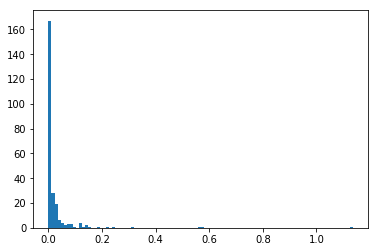

In [241]:
plt.hist(DF_all_vectorized_w_metadata.likes_score, bins = 100)

In [164]:
DF_all_vectorized_w_metadata.final_score

0      0.000661
1      0.000500
2      0.001830
3      0.000000
4      0.000309
5      0.000892
6      0.093151
7      0.004902
8      0.000000
9      0.022971
10     0.002525
11     0.000140
12     0.000132
13     0.000000
14     0.011521
15     0.015191
16     0.000000
17     0.003106
18     0.020833
19     0.018692
20     0.000000
21     0.081174
22     0.044444
23     0.001214
24     0.023018
25     0.000000
26     0.001362
27     0.244887
28     0.000318
29     0.005298
         ...   
218    0.001143
219    0.000615
220    0.000519
221    0.033079
222    0.001855
223    0.000297
224    0.000000
225    0.000922
226    0.016908
227    0.028986
228    0.002567
229    0.004792
230    0.714286
231    0.000899
232    0.000000
233    0.008945
234    0.004539
235    0.003613
236    0.005317
237    0.000000
238    0.000000
239    0.002611
240    0.055046
241    0.015528
242    0.000000
243    0.000775
244    0.031250
245    0.000390
246    0.023392
247    0.018895
Name: final_score, Lengt

In [167]:
DF_all_vectorized_w_metadata.columns

Index(['Unnamed: 0', 'User_Handle', 'URL', 'R_Mean', 'R_STD', 'R_MED',
       'G_Mean', 'G_STD', 'G_MED', 'B_Mean', 'B_STD', 'B_MED', 'Canny',
       'ORB_X', 'ORB_Y', 'username', 'Unnamed: 0.1', 'index', 'caption',
       'caption_hashtags', 'caption_mentions', 'comments', 'date_local',
       'date_utc', 'is_video', 'likes', 'mediaid', 'owner_id',
       'owner_username', 'shortcode', 'tagged_users', 'typename', 'url',
       'video_url', 'followers', 'likes_score', 'comments_score',
       'zscore_likes', 'zscore_comments', 'final_score'],
      dtype='object')

In [168]:
## prep the DF
df = DF_all_vectorized_w_metadata
remove = ['User_Handle', 'URL', 'username', 'Unnamed: 0', 'index', 'caption', 'caption_hashtags', 
          'caption_mentions', 'comments', 'date_local', 'date_utc', 'is_video', 'likes', 'mediaid', 
          'owner_id', 'owner_username', 'shortcode', 'tagged_users', 'typename', 'url', 'video_url', 
          'followers', 'likes_score', 'comments_score', 'zscore_likes', 'zscore_comments']
df.drop(remove, axis = 1, inplace = True)

In [169]:
## any null?
print(df.isnull().sum(axis=0))
df = df.dropna()
print(df.isnull().sum(axis=0))

R_Mean          0
R_STD           0
R_MED           0
G_Mean          0
G_STD           0
G_MED           0
B_Mean          0
B_STD           0
B_MED           0
Canny           0
ORB_X           0
ORB_Y           0
Unnamed: 0.1    0
final_score     0
dtype: int64
R_Mean          0
R_STD           0
R_MED           0
G_Mean          0
G_STD           0
G_MED           0
B_Mean          0
B_STD           0
B_MED           0
Canny           0
ORB_X           0
ORB_Y           0
Unnamed: 0.1    0
final_score     0
dtype: int64


In [178]:
#### WP NOTES 

from sklearn.linear_model import Lasso, Ridge

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import normalize 


y = df.final_score

predictors = ['R_Mean', 'R_STD', 'R_MED', 'G_Mean', 'G_STD', 'G_MED', 'B_Mean',
       'B_STD', 'B_MED', 'Canny', 'ORB_X', 'ORB_Y',]
X = df[predictors]

X = normalize(X, axis=0)
print(X.shape)

poly = PolynomialFeatures(4) 
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
print(X_train.shape)

l_model = Lasso(alpha=10.)
l_model.fit(X_train, y_train)
print(l_model.score(X_train, y_train))
print(l_model.score(X_test, y_test))

(248, 12)
(148, 1820)
0.0
-0.00015707068071879601


In [179]:
#### WP NOTES 

from sklearn.linear_model import Lasso, Ridge

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import normalize, MinMaxScaler
from sklearn.tree import DecisionTreeRegressor


y = df.final_score

predictors = ['R_Mean', 'R_STD', 'R_MED', 'G_Mean', 'G_STD', 'G_MED', 'B_Mean',
       'B_STD', 'B_MED', 'Canny', 'ORB_X', 'ORB_Y',]
X = df[predictors]

#X = normalize(X, axis=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape)

poly = PolynomialFeatures(4) 
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)
print(X_train.shape)

#l_model = Lasso(alpha=0.001)
l_model = DecisionTreeRegressor(max_depth=2)
l_model.fit(X_train, y_train)
print(y_train)
print(l_model.score(X_train, y_train))
print(l_model.score(X_test, y_test))

(248, 12)
(148, 1820)
133    1.0
7      1.0
105    1.0
2      1.0
89     1.0
207    1.0
242    0.0
212    1.0
140    1.0
100    1.0
127    1.0
130    1.0
8      0.0
211    1.0
190    1.0
84     1.0
204    1.0
113    1.0
163    1.0
43     1.0
181    1.0
245    1.0
36     0.0
170    1.0
154    1.0
16     0.0
171    1.0
86     1.0
35     0.0
111    1.0
      ... 
214    1.0
18     1.0
12     1.0
120    1.0
124    1.0
62     1.0
232    0.0
184    0.0
202    1.0
216    1.0
187    0.0
188    1.0
128    1.0
220    1.0
221    1.0
161    1.0
91     1.0
117    1.0
40     0.0
59     1.0
180    1.0
22     1.0
65     1.0
125    1.0
150    1.0
56     0.0
182    1.0
247    1.0
92     1.0
126    1.0
Name: final_score, Length: 148, dtype: float64
0.21122091023730402
-0.2651409196863743


In [ ]:
for i,v in enumerate(df.final_score):
    if v > 0: 
        df.final_score[i] = 1
    else: 
        df.final_score[i] = 0

In [182]:
df.shape

(248, 14)

(248, 12)
(148, 91)


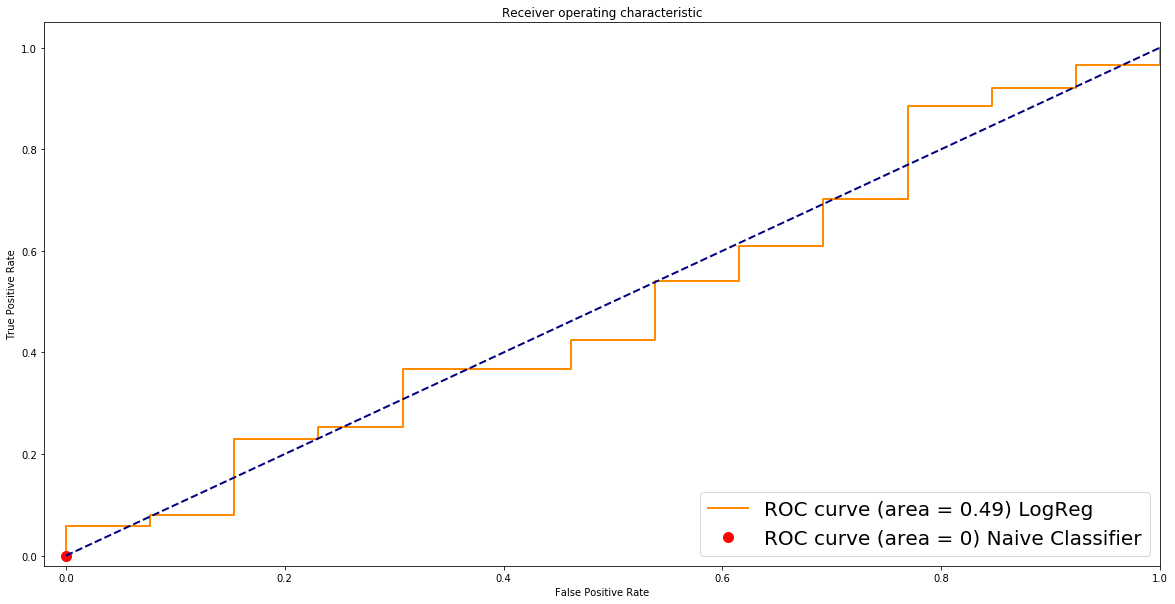

The Area under the curve is very low:  0.49248452696728556


In [201]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import roc_curve, auc
y = df.final_score

predictors = ['R_Mean', 'R_STD', 'R_MED', 'G_Mean', 'G_STD', 'G_MED', 'B_Mean',
       'B_STD', 'B_MED', 'Canny', 'ORB_X', 'ORB_Y',]
X = df[predictors]

#X = normalize(X, axis=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape)

poly = PolynomialFeatures(2) 
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)
print(X_train.shape)



#Log Regression using LRCV
#cross validation values
cvals = [1, 10, 100, 10000, 100000]
logit = LogisticRegressionCV(Cs=cvals, penalty='l2', cv=5, scoring = "roc_auc", class_weight = 'balanced')
logit.fit(X_train, y_train)
y_hat_train = logit.predict(X_train)
y_hat_test = logit.predict(X_test)
#####
preds = logit.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test, [0 for y in y_test])
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
plt.figure(figsize=(20,10))
lw = 2
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f) LogReg' % roc_auc)
plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label='ROC curve (area = 0) Naive Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", prop={'size':20})
plt.show()
print("The Area under the curve is very low: " , roc_auc)

In [225]:
# SVM



from sklearn.svm import SVC
from sklearn.metrics import f1_score

y = df.final_score

predictors = ['R_Mean', 'R_STD', 'R_MED', 'G_Mean', 'G_STD', 'G_MED', 'B_Mean',
       'B_STD', 'B_MED', 'Canny', 'ORB_X', 'ORB_Y',]
X = df[predictors]

#X = normalize(X, axis=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape)

#poly = PolynomialFeatures(2) 
#X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=9)
print(X_train.shape)



#Log Regression using LRCV
#cross validation values
cvals = [1, 10, 100, 10000, 100000]
logit  = SVC()
logit.fit(X_train, y_train)
y_hat_train = logit.predict(X_train)
y_hat_test = logit.predict(X_test)
#####
print(logit.score(X_test, y_test), logit.score(X_train, y_train))

print(f1_score(y_test, y_hat_test, average='binary'))
print(f1_score(y_train, y_hat_train, average='binary'))

(248, 12)
(124, 12)
0.8709677419354839 0.8145161290322581
0.9310344827586207
0.8977777777777779


(248, 12)
(148, 91)


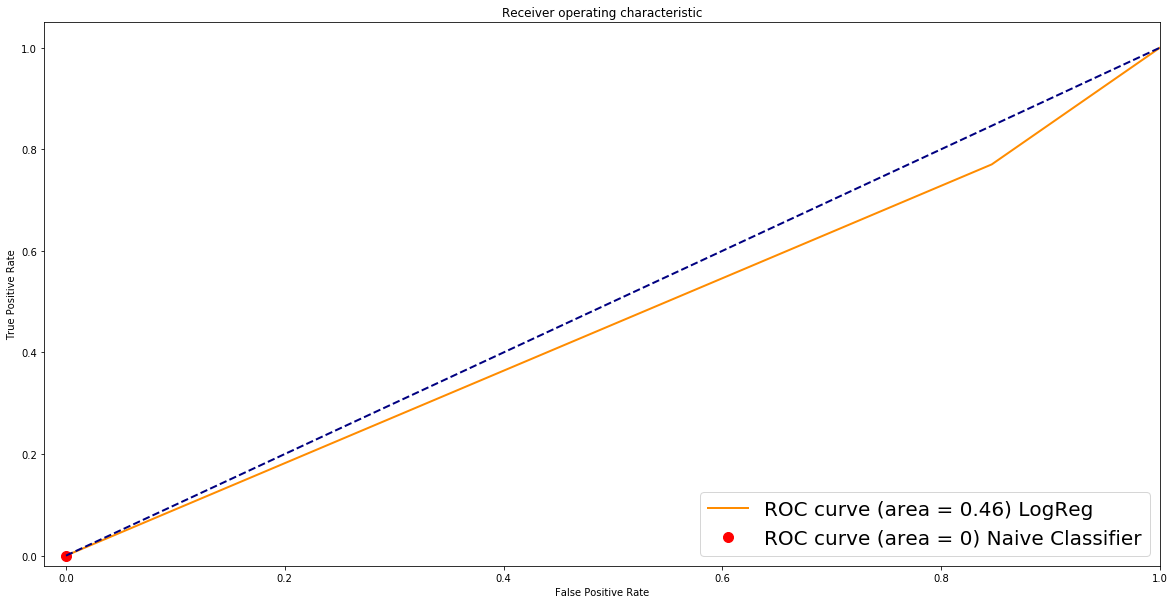

The Area under the curve is very low:  0.4619805481874447


In [207]:
## DT
from sklearn.tree import DecisionTreeClassifier



y = df.final_score

predictors = ['R_Mean', 'R_STD', 'R_MED', 'G_Mean', 'G_STD', 'G_MED', 'B_Mean',
       'B_STD', 'B_MED', 'Canny', 'ORB_X', 'ORB_Y',]
X = df[predictors]

#X = normalize(X, axis=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape)

poly = PolynomialFeatures(2) 
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)
print(X_train.shape)



#Log Regression using LRCV
#cross validation values
cvals = [1, 10, 100, 10000, 100000]
logit  = DecisionTreeClassifier(max_depth = 5000, class_weight = 'balanced')
logit.fit(X_train, y_train)
y_hat_train = logit.predict(X_train)
y_hat_test = logit.predict(X_test)
#####
preds = logit.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test, [0 for y in y_test])
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
plt.figure(figsize=(20,10))
lw = 2
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f) LogReg' % roc_auc)
plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label='ROC curve (area = 0) Naive Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", prop={'size':20})
plt.show()
print("The Area under the curve is very low: " , roc_auc)

(248, 12)
(148, 1820)


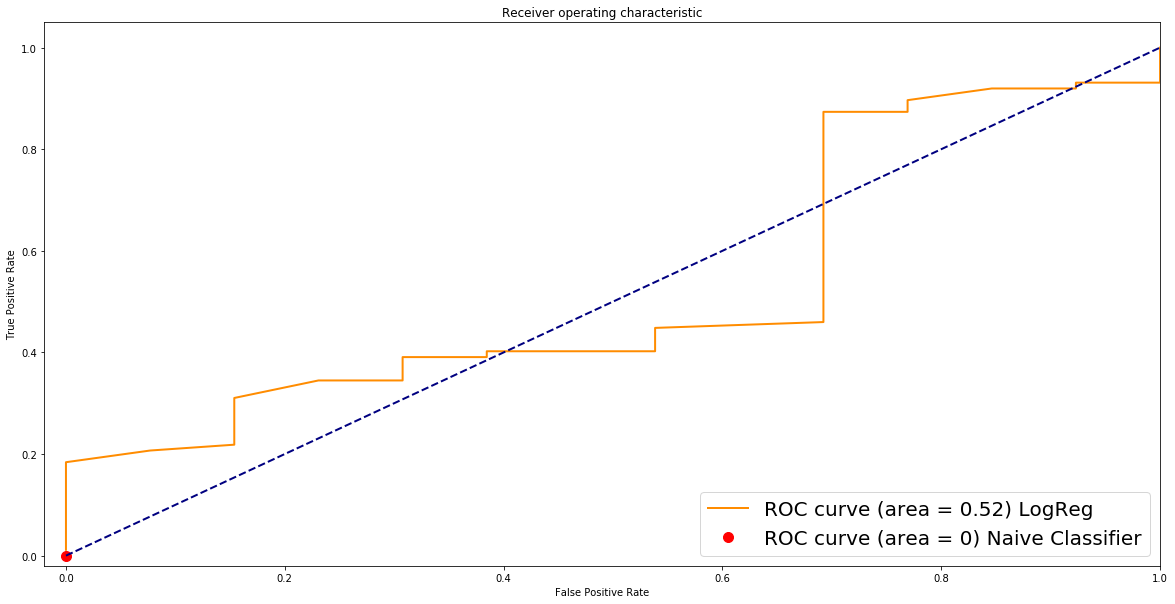

The Area under the curve is very low:  0.5243147656940761


In [215]:
## RF

from sklearn.ensemble import RandomForestClassifier



y = df.final_score

predictors = ['R_Mean', 'R_STD', 'R_MED', 'G_Mean', 'G_STD', 'G_MED', 'B_Mean',
       'B_STD', 'B_MED', 'Canny', 'ORB_X', 'ORB_Y',]
X = df[predictors]

#X = normalize(X, axis=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape)

poly = PolynomialFeatures(4) 
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)
print(X_train.shape)



#Log Regression using LRCV
#cross validation values
cvals = [1, 10, 100, 10000, 100000]
logit  = RandomForestClassifier( n_estimators = 500, class_weight = 'balanced')
logit.fit(X_train, y_train)
y_hat_train = logit.predict(X_train)
y_hat_test = logit.predict(X_test)
#####
preds = logit.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, preds)
fpr_2, tpr_2, thresholds_2 = metrics.roc_curve(y_test, [0 for y in y_test])
roc_auc_2 = metrics.auc(fpr_2, tpr_2)
plt.figure(figsize=(20,10))
lw = 2
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
lw=lw, label='ROC curve (area = %0.2f) LogReg' % roc_auc)
plt.plot([0], [0], marker='o', markersize=10, lw = 0, color="red", label='ROC curve (area = 0) Naive Classifier')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.02, 1.0])
plt.ylim([-0.02, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right", prop={'size':20})
plt.show()
print("The Area under the curve is very low: " , roc_auc)

In [191]:
y = df.final_score

predictors = ['R_Mean', 'R_STD', 'R_MED', 'G_Mean', 'G_STD', 'G_MED', 'B_Mean',
       'B_STD', 'B_MED', 'Canny', 'ORB_X', 'ORB_Y',]
X = df[predictors]

#X = normalize(X, axis=0)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X.shape)

poly = PolynomialFeatures(4) 
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)
print(X_train.shape)

pca = PCA()
pca.fit(X_train)
var_c = np.cumsum(pca.explained_variance_ratio_)

n_components_pca = np.sum(var_c<0.9)
print("the first %i components explain %0.3f of variance" % (n_components_pca, var_c[n_components_pca]))


X_train_pca = pca.transform(X_train)[:,:n_components_pca]
X_test_pca = pca.transform(X_test)[:,:n_components_pca]

alpha=[1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
ridge = RidgeCV(alphas=alpha, cv=10, fit_intercept=True)
ridge.fit(X_train_pca, y_train)
y_hat_pca_train = ridge.predict(X_train_pca)
y_hat_pca_test = ridge.predict(X_test_pca)
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc


print(ridge.score(X_train_pca, y_train), ridge.score(X_test_pca, y_test))

(248, 12)
(148, 1820)
the first 4 components explain 0.904 of variance
0.001478715722038393 -0.017740087098710777


In [189]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression as Linear
from bs4 import BeautifulSoup
import urllib
import sys
import numpy as np
import pandas as pd
import matplotlib
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import RegressionResults
import seaborn as sns
import sklearn as sk
import collections
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn import discriminant_analysis
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.regression.linear_model import RegressionResults
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn import tree
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
from sklearn import ensemble
#import pydotplus
#import io
import collections
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import matplotlib.patches as patches

/anaconda/envs/python3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
